## Measures - Experiments

In [166]:
import pandas as pd
import pm4py
from pm4py.objects.ocel.importer.xmlocel import importer as xmlocel_importer


In [167]:
# import game ocels 
ocel_game1 = xmlocel_importer.apply("output_logs/game.xmlocel")
ocel_game2 = xmlocel_importer.apply("output_logs/game2.xmlocel")


In [168]:
ocel_extended_table_game1 = ocel_game1.get_extended_table()
ocel_extended_table_game2 = ocel_game2.get_extended_table()

ocel_extended_table_game1

,ocel:eid,ocel:activity,ocel:timestamp,attribute:subtype,attribute:duration,attribute:crossed_grid,attribute:attack_game,attribute:attack_successful,attribute:home_team_score,attribute:away_team_score,...,attribute:start_y,attribute:end_x,attribute:end_y,attribute:travel_distance,attribute:start_grid,ocel:type:Team,ocel:type:Player,ocel:type:case:concept:name,ocel:type:ball,ocel:type:end_grid
0,0,SET PIECE-KICK OFF,1970-01-01 00:00:00+00:00,KICK OFF,-0.04,True,1,False,0,0,...,NaN,NaN,NaN,NaN,NaN,[Away],[Player19],[AA1],[ball_1],NaN
1,1,PASS Received1,1970-01-01 00:00:00+00:00,NaN,0.08,True,1,False,0,0,...,0.43,0.55000,0.43000,0.107703,D2,[Away],[Player21],[AA1],[ball_1],[D2]
2,2,PASS Out1,1970-01-01 00:00:00+00:00,NaN,0.08,True,1,False,0,0,...,0.39,0.55000,0.43000,0.107703,C2,[Away],[Player19],[AA1],[ball_1],[D2]
3,3,Player changes position,1970-01-01 00:00:00+00:00,NaN,NaN,NaN,1,False,0,0,...,NaN,0.52697,0.37980,NaN,NaN,[Home],[Player9],[AA1],NaN,[D2]
4,4,Player changes position,1970-01-01 00:00:00+00:00,NaN,NaN,NaN,1,False,0,0,...,NaN,0.55243,0.43269,NaN,NaN,[Home],[Player10],[AA1],NaN,[D2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18516,18516,Player changes position,1970-01-01 01:36:35+00:00,NaN,NaN,NaN,355,False,4,0,...,NaN,0.33270,0.63418,NaN,C3,[Home],[Player3],[AA175],NaN,[B3]
18517,18517,Player changes position,1970-01-01 01:36:39+00:00,NaN,NaN,NaN,355,False,4,0,...,NaN,0.29972,0.49964,NaN,B3,[Away],[Player23],[AA175],NaN,[B2]
18518,18518,Player changes position,1970-01-01 01:36:39+00:00,NaN,NaN,NaN,355,False,4,0,...,NaN,0.33351,0.65372,NaN,B3,[Home],[Player13],[AA175],NaN,[C3]
18519,18519,Player changes position,1970-01-01 01:36:40+00:00,NaN,NaN,NaN,355,False,4,0,...,NaN,0.16673,0.76740,NaN,A4,[Home],[Player9],[AA175],NaN,[B4]


In [169]:
print("unique activities in game1:", ocel_extended_table_game1['ocel:activity'].unique())

unique activities in game1: ['SET PIECE-KICK OFF' 'PASS Received1' 'PASS Out1'
 'Player changes position' 'PASS Received2' 'PASS Out2' 'PASS Received3'
 'PASS Out3' 'PASS Received4' 'PASS Out4' 'PASS Out5' 'PASS Received5'
 'PASS Out6' 'PASS Received6' 'BALL LOST-INTERCEPTION'
 'RECOVERY-INTERCEPTION' 'BALL LOST-HEAD-INTERCEPTION'
 'CHALLENGE-AERIAL-LOST' 'CHALLENGE-AERIAL-WON' 'PASS Received' 'PASS Out'
 'BALL OUT' 'SET PIECE-CORNER KICK' 'SHOT-HEAD-ON TARGET-GOAL'
 'SET PIECE-THROW IN' 'BALL LOST' 'RECOVERY' 'CHALLENGE-GROUND-WON'
 'CHALLENGE-GROUND-LOST' 'CHALLENGE-TACKLE-WON' 'RECOVERY-THEFT'
 'CHALLENGE-TACKLE-LOST' 'BALL LOST-THEFT' 'SHOT-OFF TARGET-OUT'
 'BALL LOST-HEAD' 'BALL LOST-CROSS-INTERCEPTION'
 'BALL LOST-GOAL KICK-INTERCEPTION' 'SHOT-ON TARGET-SAVED'
 'RECOVERY-SAVED' 'BALL LOST-HEAD-FORCED' 'CHALLENGE-AERIAL-FAULT-WON'
 'CHALLENGE-AERIAL-FAULT-LOST' 'SET PIECE-FREE KICK'
 'BALL OUT-HEAD-CLEARANCE' 'BALL OUT-CLEARANCE' 'FAULT RECEIVED'
 'CHALLENGE-GROUND-FAULT-WON' 'CHA

In [170]:
# turn fields into single string values instead of a list of a string value
ocel_extended_table_game1["ocel:type:case:concept:name"] = ocel_extended_table_game1["ocel:type:case:concept:name"].apply(lambda x: x[0] if isinstance(x, list) else x)
ocel_extended_table_game1["ocel:type:Team"] = ocel_extended_table_game1["ocel:type:Team"].apply(lambda x: x[0] if isinstance(x, list) else x)

ocel_extended_table_game2["ocel:type:case:concept:name"] = ocel_extended_table_game2["ocel:type:case:concept:name"].apply(lambda x: x[0] if isinstance(x, list) else x)
ocel_extended_table_game2["ocel:type:Team"] = ocel_extended_table_game2["ocel:type:Team"].apply(lambda x: x[0] if isinstance(x, list) else x)


# separate the rows for away and home teams possessions (but including both teams events during that time)
rows_possessions_away = ocel_extended_table_game1[ocel_extended_table_game1["ocel:type:case:concept:name"].str.startswith("AA")]
rows_possessions_home = ocel_extended_table_game1[ocel_extended_table_game1["ocel:type:case:concept:name"].str.startswith("HA")]

# group by possessions
possessions_away = rows_possessions_away.groupby("ocel:type:case:concept:name")
possessions_home = rows_possessions_home.groupby("ocel:type:case:concept:name")


In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

def basic_count_analysis(away_counts, home_counts):
    # Convert to DataFrame and add a label column
    away_df = pd.DataFrame({'event_count': away_counts, 'team': 'Away'})
    home_df = pd.DataFrame({'event_count': home_counts, 'team': 'Home'})

    # Combine into one DataFrame
    combined_df = pd.concat([away_df, home_df]).reset_index(drop=True)

    plt.figure(figsize=(10, 6))
    sns.histplot(data=combined_df, x='event_count', hue='team', kde=True, element='step', stat='density', common_norm=False)
    plt.title("Distribution of Event Counts per Possession (Home vs Away)")
    plt.xlabel("Number of Events in Possession")
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=combined_df, x='team', y='event_count')
    plt.title("Event Count Distribution per Possession")
    plt.ylabel("Number of Events")
    plt.xlabel("Team")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Perform Mann–Whitney U test (two-sided)
    stat, p_value = mannwhitneyu(away_counts, home_counts, alternative='two-sided')

    # Show result
    print(f"Mann–Whitney U test statistic: {stat}")
    print(f"P-value: {p_value:.4f}")


## Total no. of events during possessions

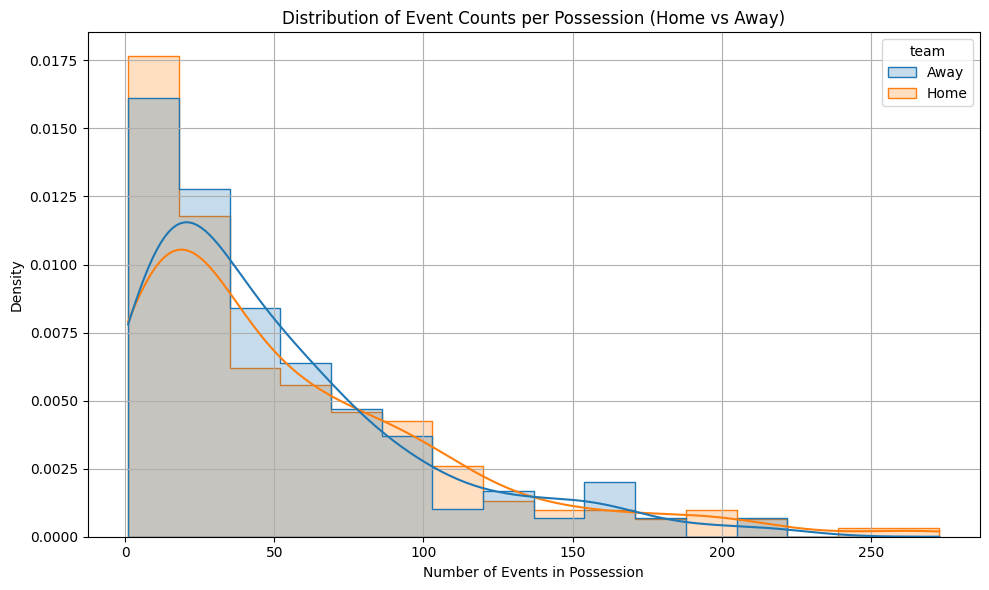

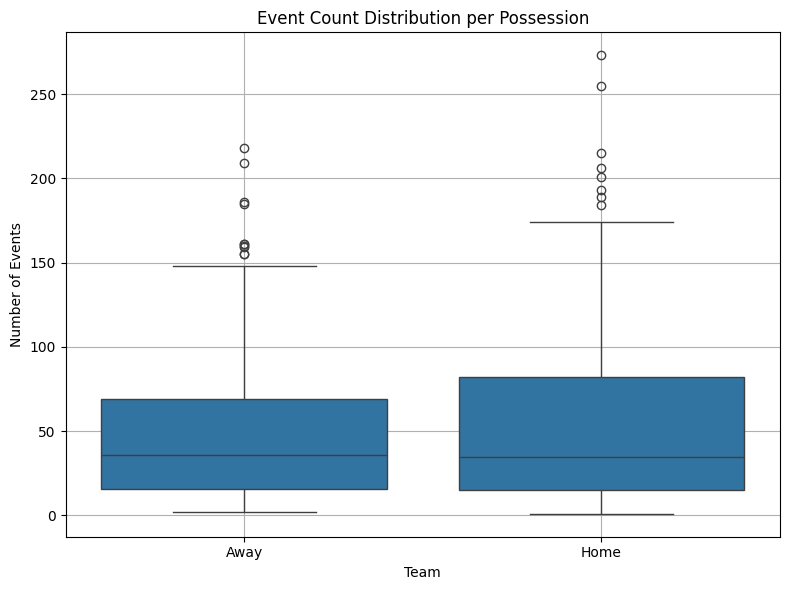

Mann–Whitney U test statistic: 15644.0
P-value: 0.9131


In [177]:
# Count the number of events in each possession
# this includes all the events of both teams during the possession (so also how the other team moves)
away_counts = possessions_away.size()
home_counts = possessions_home.size()
basic_count_analysis(away_counts, home_counts)

## No. of events of the possessions team during possessions

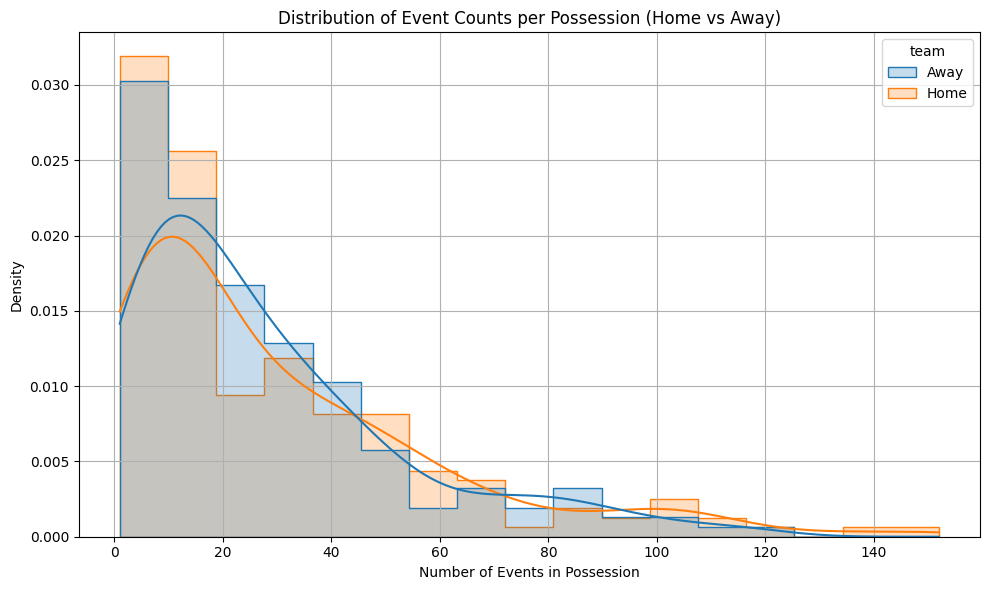

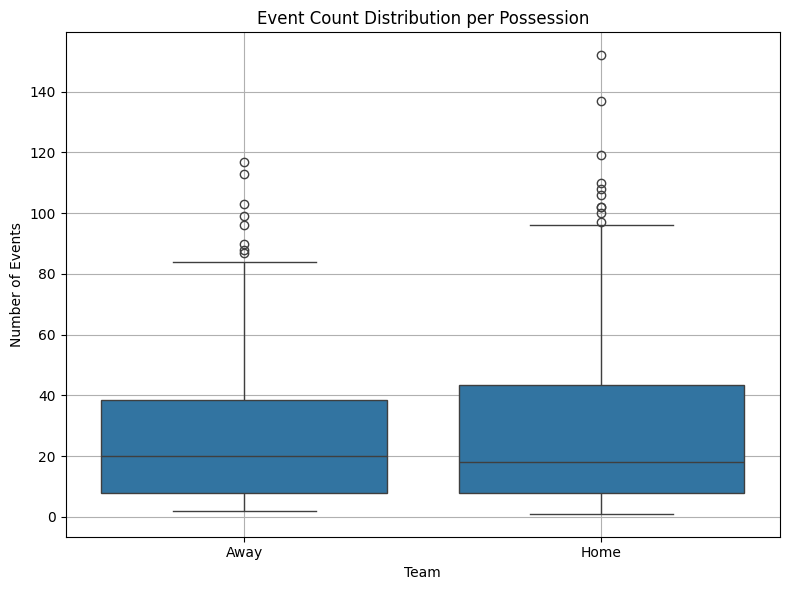

Mann–Whitney U test statistic: 15934.0
P-value: 0.8494


In [178]:
# separate the rows for away and home teams possessions and only their own events
rows_possessions_away_team_away = rows_possessions_away[rows_possessions_away["ocel:type:Team"] == "Away"]
rows_possessions_home_team_home = rows_possessions_home[rows_possessions_home["ocel:type:Team"] == "Home"]

# group by possessions
possessions_away_team_away = rows_possessions_away_team_away.groupby("ocel:type:case:concept:name")
possessions_home_team_home = rows_possessions_home_team_home.groupby("ocel:type:case:concept:name")

# Count the number of events in each possession that belongs to the team that has the possession
away_counts = possessions_away_team_away.size()
home_counts = possessions_home_team_home.size()
basic_count_analysis(away_counts, home_counts)

## How many events for traces with shot?

### Total no. of events during shot possessions

No. of possessions with shot AWAY:  6
No. of possessions with shot HOME:  18


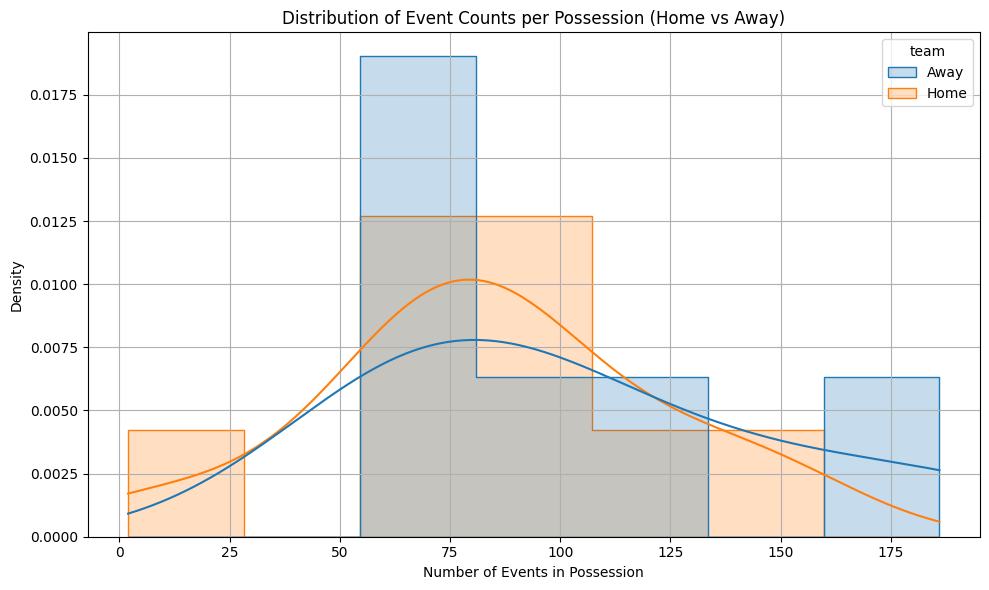

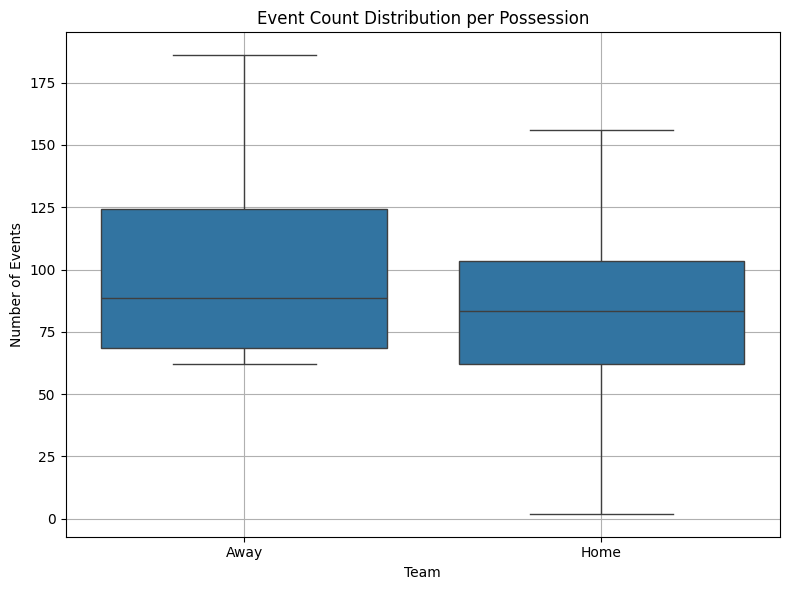

Mann–Whitney U test statistic: 64.0
P-value: 0.5262


In [179]:
# filter for those possessions that have a shot activity
possessions_away_with_shot = possessions_away.filter(lambda x: any(str(act).startswith("SHOT") for act in x['ocel:activity'].values))
possessions_away_with_shot = possessions_away_with_shot.groupby("ocel:type:case:concept:name")
print("No. of possessions with shot AWAY: ", possessions_away_with_shot.ngroups)

possessions_home_with_shot = possessions_home.filter(lambda x: any(str(act).startswith("SHOT") for act in x['ocel:activity'].values))
possessions_home_with_shot = possessions_home_with_shot.groupby("ocel:type:case:concept:name")
print("No. of possessions with shot HOME: ", possessions_home_with_shot.ngroups)

# This includes all the events of both teams during the possession (so also how the other team moves)
away_counts = possessions_away_with_shot.size()
home_counts = possessions_home_with_shot.size()
basic_count_analysis(away_counts, home_counts)


### Shot teams no. of events during possessions

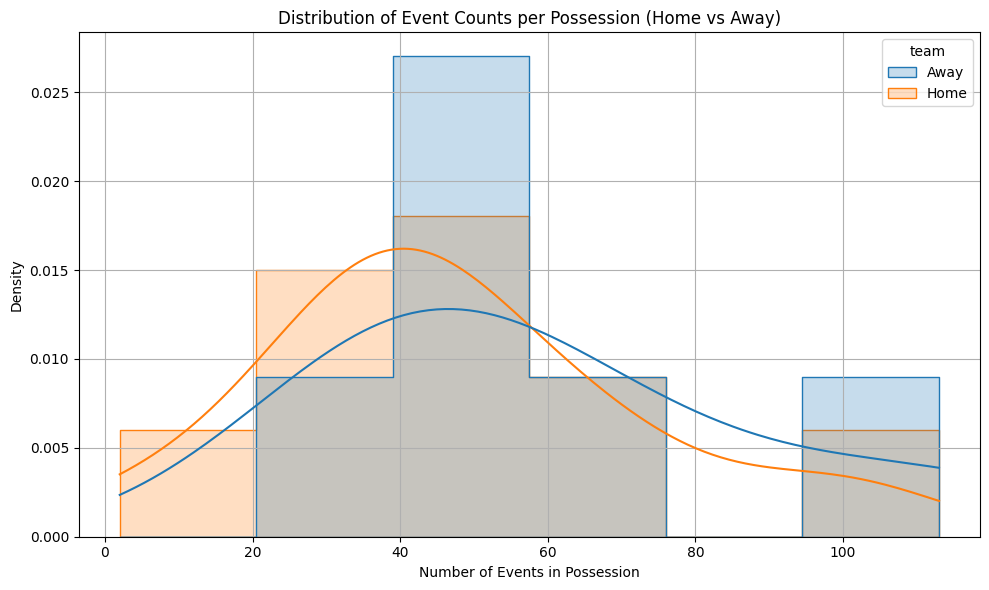

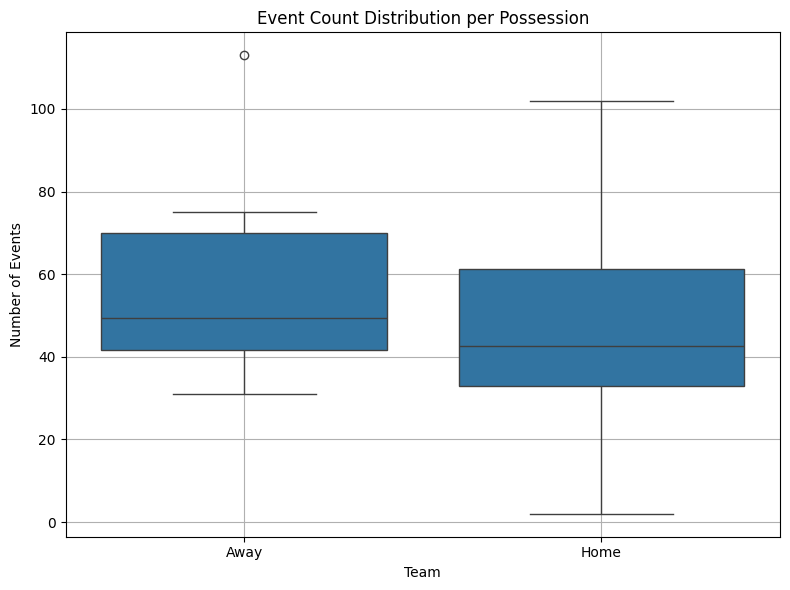

Mann–Whitney U test statistic: 68.0
P-value: 0.3677


In [180]:
# This includes only the events of the team that has the possession
# filter for those possessions that have a shot activity
possessions_away_team_away_with_shot = possessions_away_team_away.filter(lambda x: any(str(act).startswith("SHOT") for act in x['ocel:activity'].values))
possessions_away_team_away_with_shot = possessions_away_team_away_with_shot.groupby("ocel:type:case:concept:name")

possessions_home_team_home_with_shot = possessions_home_team_home.filter(lambda x: any(str(act).startswith("SHOT") for act in x['ocel:activity'].values))
possessions_home_team_home_with_shot = possessions_home_team_home_with_shot.groupby("ocel:type:case:concept:name")

# This includes only the events of the team that has the possession
away_counts = possessions_away_team_away_with_shot.size()
home_counts = possessions_home_team_home_with_shot.size()
basic_count_analysis(away_counts, home_counts)

In [181]:
away_possessions_with_shot_groupIDs = list(possessions_away_team_away_with_shot.groups.keys())
print("Available possession group names (Away team, with shot):")
print(away_possessions_with_shot_groupIDs)

Available possession group names (Away team, with shot):
['AA103', 'AA138', 'AA156', 'AA16', 'AA166', 'AA36']


In [201]:
groupId = "AA156"

possessionWithShot = possessions_away_team_away_with_shot.get_group(groupId)
possessionWithShot_events = possessionWithShot[possessionWithShot['ocel:activity'] != "Player changes position"]['ocel:activity'].values
print("Events in possession (Away Team) excluding 'Player changes position':")
for event in possessionWithShot_events:
    print(event)

Events in possession (Away Team) excluding 'Player changes position':
RECOVERY-INTERCEPTION
PASS Out1
PASS Received1
PASS Out2
PASS Received2
PASS Out3
PASS Received3
PASS Received4
PASS Out4
PASS Out5
PASS Received5
PASS Received6
PASS Out6
SHOT-OFF TARGET-OUT


In [187]:
def get_change_position_count_of_shot_player(groupId, possessions):
    shot_event_possession = possessions.get_group(groupId)
    shot_event = shot_event_possession[shot_event_possession['ocel:activity'].apply(lambda act: str(act).startswith('SHOT'))]
    # Get the player who performed the shot
    player = shot_event["ocel:type:Player"].values[0]
    #print("Player who performed the shot:", player)
    # Get all activities in group performed by the player who took the shot
    player_id = player[0]
    group = possessions.get_group(groupId)
    player_activities = group[group["ocel:type:Player"].apply(lambda x: player_id in x)]["ocel:activity"].values
    change_position_count = (player_activities == "Player changes position").sum()
    #print(f"Number of 'Player changes position' activities for {player_id}: {change_position_count}")
    return change_position_count
    #print(f"All activities in group by {player_id}:")
    #for act in player_activities:
    #    print(act)

In [188]:
home_possessions_with_shot_groupIDs = list(possessions_home_team_home_with_shot.groups.keys())
print("Available possession group names (Home team, with shot):")
print(home_possessions_with_shot_groupIDs)

#possessionWithShot = possessions_home_team_home_with_shot.get_group("HA4")
#possessionWithShot_events = possessionWithShot[possessionWithShot['ocel:activity'] != "Player changes position"]['ocel:activity'].values
#print("Events in possession (Home Team) excluding 'Player changes position':")
#for event in possessionWithShot_events:
#    print(event)

Available possession group names (Home team, with shot):
['HA106', 'HA11', 'HA121', 'HA132', 'HA133', 'HA156', 'HA160', 'HA173', 'HA19', 'HA32', 'HA4', 'HA46', 'HA53', 'HA77', 'HA78', 'HA84', 'HA88', 'HA95']


## Shot players no. of position changes

Away team shot player 'Player changes position' activity counts:
[np.int64(5), np.int64(3), np.int64(2), np.int64(2), np.int64(6), np.int64(4)]
Home team shot player 'Player changes position' activity counts:
[np.int64(3), np.int64(8), np.int64(9), np.int64(2), np.int64(5), np.int64(2), np.int64(3), np.int64(7), np.int64(4), np.int64(2), np.int64(15), np.int64(4), np.int64(3), np.int64(3), np.int64(0), np.int64(6), np.int64(1), np.int64(4)]


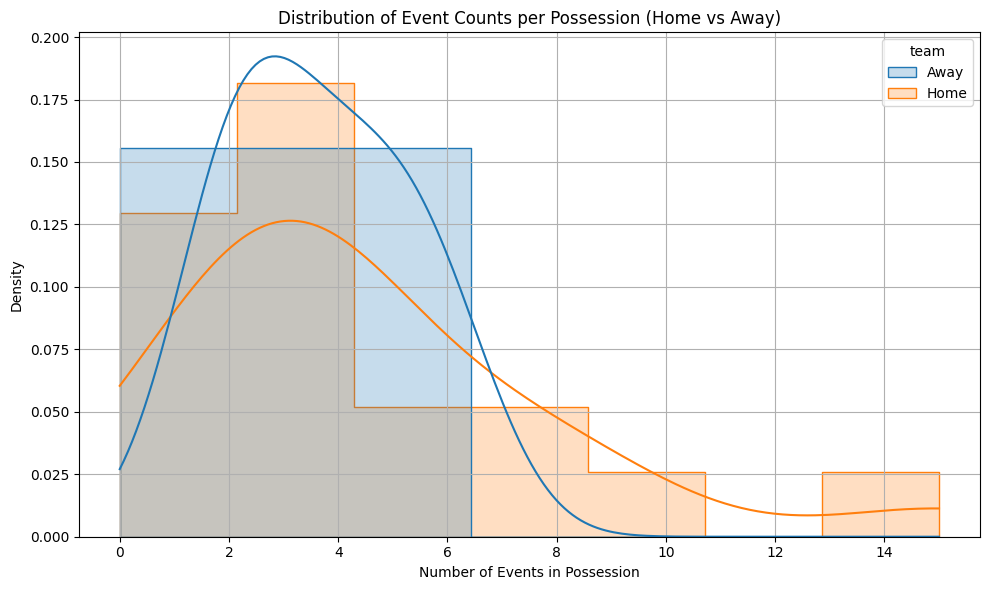

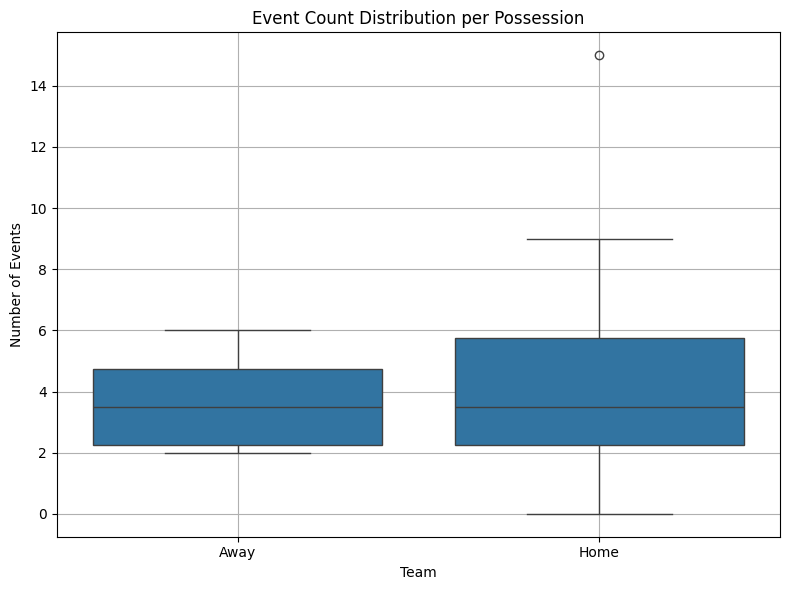

Mann–Whitney U test statistic: 50.5
P-value: 0.8397


In [189]:
away_shot_player_activity_counts = [get_change_position_count_of_shot_player(gid, possessions_away_team_away_with_shot) for gid in away_possessions_with_shot_groupIDs]
print("Away team shot player 'Player changes position' activity counts:")
print(away_shot_player_activity_counts)

home_shot_player_activity_counts = [get_change_position_count_of_shot_player(gid, possessions_home_team_home_with_shot) for gid in home_possessions_with_shot_groupIDs]
print("Home team shot player 'Player changes position' activity counts:")
print(home_shot_player_activity_counts)

basic_count_analysis(away_shot_player_activity_counts, home_shot_player_activity_counts)

/Users/paul/miniconda3/envs/pm4py-env/lib/python3.13/site-packages/pm4py/objects/ocel/util/extended_table.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df[internal_index] = events_df.index
/Users/paul/miniconda3/envs/pm4py-env/lib/python3.13/site-packages/pm4py/objects/ocel/util/extended_table.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df.sort_values([event_timestamp, internal_index], inplace=True)
importing OCEL, parsed rows :: 100%|██████████| 55/55 [00:00<00:00, 4600.85it/s]
/Users/paul/miniconda3/envs/pm4py-env/lib/python3.13/

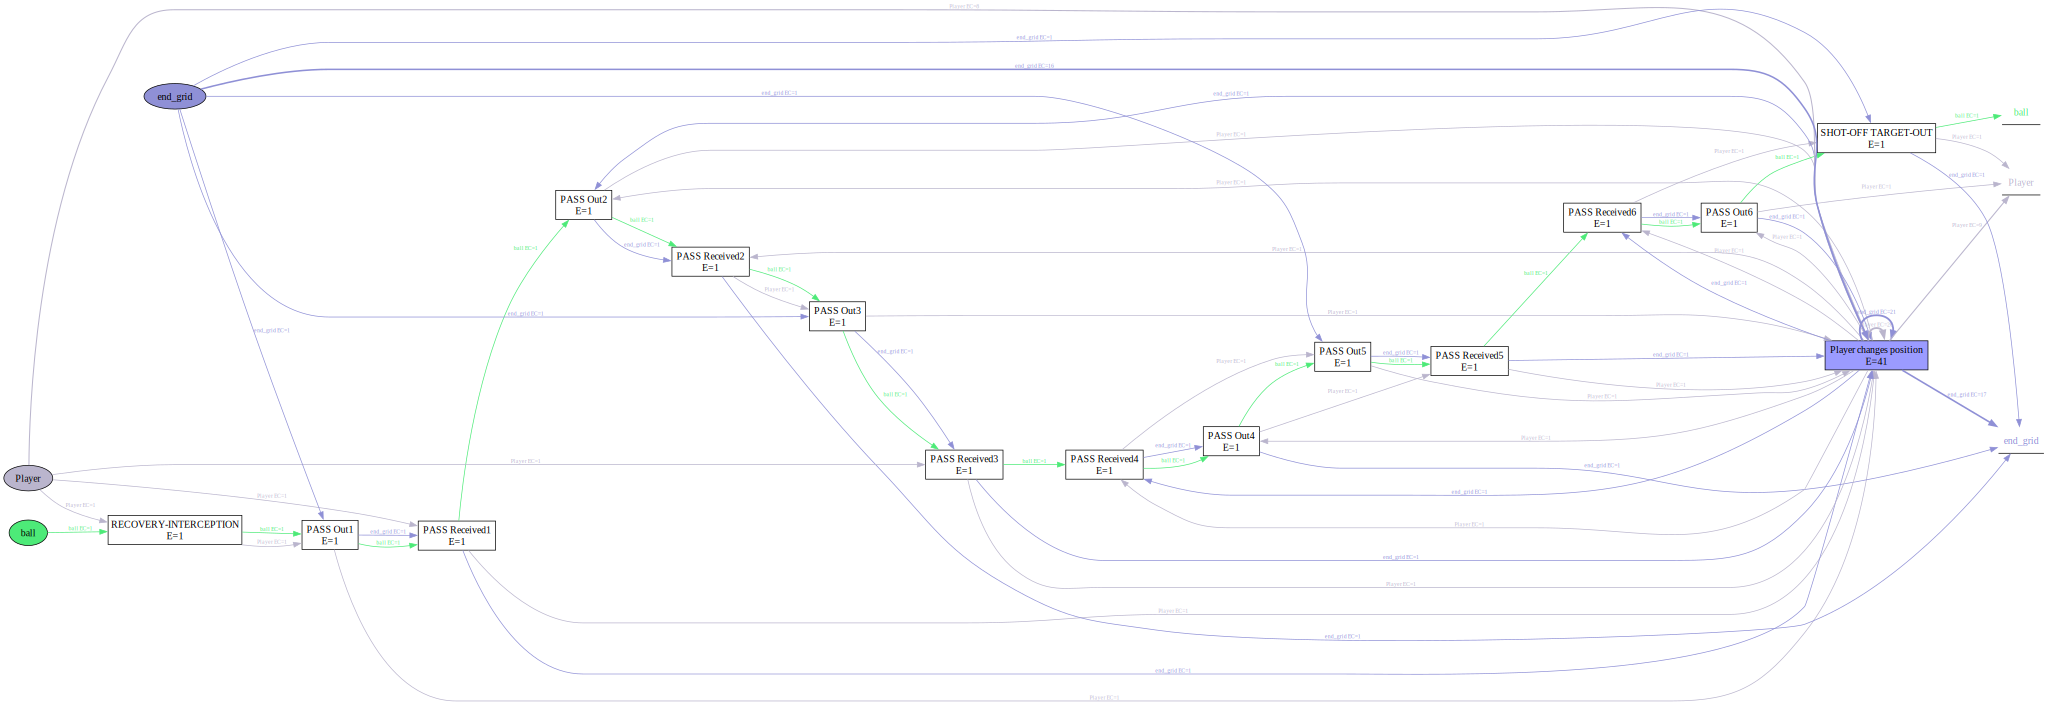

In [202]:
from pm4py.objects.ocel.importer.csv import importer as csv_importer

groupId= "AA156"

possessions_away_team_away_with_shot.get_group(groupId).to_csv("possessions_away_team_away_with_shot.csv", index=False)

ocel_filtered = csv_importer.apply("possessions_away_team_away_with_shot.csv")

#pm4py.write_ocel(ocel_filtered, "output_logs/possessions_away_team_away_with_shot.xmlocel")

dfg=pm4py.ocel.discover_ocdfg(ocel_filtered)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

In [203]:
####################################
# GET BALL MOVEMENT DURING THE POSSESSION
ball_rows = possessions_away_team_away_with_shot.get_group(groupId)[possessions_away_team_away_with_shot.get_group(groupId)["ocel:activity"] != "Player changes position"]
# extract the balls movement during the possession
ball_movement = ball_rows["attribute:start_grid"]
# Convert string representation of list to actual list and extract the value
print("ball movement:", ball_movement)
ball_movement_grid_cells = ball_movement.tolist()
ball_movement_activities = ball_rows["ocel:activity"].tolist()

print("ball movement:", ball_movement_grid_cells)
print("ball movement activities:", ball_movement_activities)


####################################
# GET PLAYER MOVEMENTS DURING THE POSSESSION
player_rows = possessions_away_team_away_with_shot.get_group(groupId)[possessions_away_team_away_with_shot.get_group(groupId)["ocel:activity"] == "Player changes position"]

player_rows

ball movement: 15892    B3
15893    B3
15894    B4
15909    B4
15910    B3
15917    B3
15918    D1
15939    D1
15940    D1
15945    D1
15946    E1
15984    F2
15985    F2
15988    F2
Name: attribute:start_grid, dtype: object
ball movement: ['B3', 'B3', 'B4', 'B4', 'B3', 'B3', 'D1', 'D1', 'D1', 'D1', 'E1', 'F2', 'F2', 'F2']
ball movement activities: ['RECOVERY-INTERCEPTION', 'PASS Out1', 'PASS Received1', 'PASS Out2', 'PASS Received2', 'PASS Out3', 'PASS Received3', 'PASS Received4', 'PASS Out4', 'PASS Out5', 'PASS Received5', 'PASS Received6', 'PASS Out6', 'SHOT-OFF TARGET-OUT']


,ocel:eid,ocel:activity,ocel:timestamp,attribute:subtype,attribute:duration,attribute:crossed_grid,attribute:attack_game,attribute:attack_successful,attribute:home_team_score,attribute:away_team_score,...,attribute:start_y,attribute:end_x,attribute:end_y,attribute:travel_distance,attribute:start_grid,ocel:type:Team,ocel:type:Player,ocel:type:case:concept:name,ocel:type:ball,ocel:type:end_grid
15896,15896,Player changes position,1970-01-01 01:22:49+00:00,NaN,NaN,NaN,319,False,4,0,...,NaN,0.29758,0.75000,NaN,B3,Away,[Player17],AA156,NaN,[B4]
15897,15897,Player changes position,1970-01-01 01:22:50+00:00,NaN,NaN,NaN,319,False,4,0,...,NaN,0.07103,0.50051,NaN,A2,Away,[Player25],AA156,NaN,[A3]
15901,15901,Player changes position,1970-01-01 01:22:51+00:00,NaN,NaN,NaN,319,False,4,0,...,NaN,0.28048,0.50023,NaN,B2,Away,[Player16],AA156,NaN,[B3]
15903,15903,Player changes position,1970-01-01 01:22:51+00:00,NaN,NaN,NaN,319,False,4,0,...,NaN,0.45917,0.75029,NaN,C3,Away,[Player18],AA156,NaN,[C4]
15905,15905,Player changes position,1970-01-01 01:22:51+00:00,NaN,NaN,NaN,319,False,4,0,...,NaN,0.37698,0.50119,NaN,C2,Away,[Player21],AA156,NaN,[C3]
15908,15908,Player changes position,1970-01-01 01:22:52+00:00,NaN,NaN,NaN,319,False,4,0,...,NaN,0.22695,0.74974,NaN,B4,Away,[Player17],AA156,NaN,[B3]
15912,15912,Player changes position,1970-01-01 01:22:54+00:00,NaN,NaN,NaN,319,False,4,0,...,NaN,0.06347,0.49981,NaN,A3,Away,[Player25],AA156,NaN,[A2]
15913,15913,Player changes position,1970-01-01 01:22:54+00:00,NaN,NaN,NaN,319,False,4,0,...,NaN,0.25420,0.75010,NaN,B3,Away,[Player17],AA156,NaN,[B4]
15916,15916,Player changes position,1970-01-01 01:22:55+00:00,NaN,NaN,NaN,319,False,4,0,...,NaN,0.34598,0.49956,NaN,C3,Away,[Player21],AA156,NaN,[C2]
15920,15920,Player changes position,1970-01-01 01:22:56+00:00,NaN,NaN,NaN,319,False,4,0,...,NaN,0.50033,0.90235,NaN,C4,Away,[Player18],AA156,NaN,[D4]


/var/folders/c0/znjbgdp95852r1d2gl38_cl40000gn/T/ipykernel_5972/2422975853.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(paths))


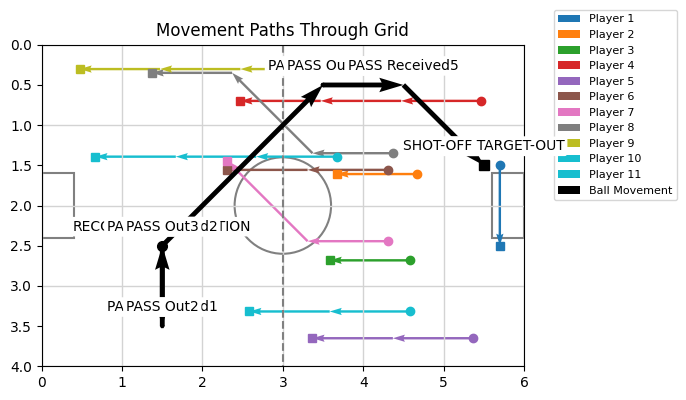

In [204]:
import matplotlib.pyplot as plt
import numpy as np
import string
import matplotlib.cm as cm

# Convert grid cell name to center coordinates
def cell_to_coords(cell):
    col_letter = cell[0].upper()
    row_number = int(cell[1:]) - 1
    col_number = string.ascii_uppercase.index(col_letter)
    return (col_number + 0.5, row_number + 0.5)

# Example: define 11 different paths (replace with your actual data)
paths = [
    # GK - no ball involvement
    ['F2', 'F3'],

    # Left CB - eventually receives the ball
    ['E2', 'D2'],  # covers E2 and D2 from ball path

    # Right CB - support
    ['E3', 'D3'],

    # Left Fullback - reaches C1
    ['F1', 'E1', 'D1', 'C1'],  # supports ball at C1

    # Right Fullback
    ['F4', 'E4', 'D4'],

    # Defensive Midfielder
    ['E2', 'D2', 'C2'],  # covers E2, D2, C2 from ball path

    # Central Midfielder
    ['E3', 'D3', 'C2'],  # reaches C2 from another angle

    # Attacking Midfielder
    ['E2', 'D2', 'C1', 'B1'],  # meets ball at C1

    # Left Winger
    ['E1', 'D1', 'C1', 'B1', 'A1'],

    # Right Winger
    ['E4', 'D4', 'C4'],

    # Striker
    ['D2', 'C2', 'B2', 'A2'],  # meets the ball at C2, then finishes at A2
]

# Set up color map
colors = cm.get_cmap('tab10', len(paths))

# Plot
fig, ax = plt.subplots(figsize=(7, 7))

# Draw grid
for i in range(11):
    ax.plot([0, 10], [i, i], color='lightgray', linewidth=1)
    ax.plot([i, i], [0, 10], color='lightgray', linewidth=1)

# === Draw simplified soccer field for 6x4 grid ===
# === Draw simplified soccer field for 6x4 grid using gray elements ===

# Midfield line (vertical center line)
ax.plot([3, 3], [0, 4], color='gray', linestyle='--', linewidth=1.5)

# Center circle
center_circle = plt.Circle((3, 2), 0.6, color='gray', fill=False, linewidth=1.5)
ax.add_patch(center_circle)

# Left goal area: width=0.4, height=0.8, centered at y=2 → y=1.6 to y=2.4
left_goal_area = plt.Rectangle((0, 1.6), 0.4, 0.8, edgecolor='gray', facecolor='none', linewidth=1.5)
ax.add_patch(left_goal_area)

# Right goal area
right_goal_area = plt.Rectangle((5.6, 1.6), 0.4, 0.8, edgecolor='gray', facecolor='none', linewidth=1.5)
ax.add_patch(right_goal_area)



####################################
####################################
# Draw all paths with slight offsets
offset_magnitude = 0.2  # how far to offset each player's path
angle_step = 2 * np.pi / len(paths)

for i, path in enumerate(paths):
    coords = [cell_to_coords(cell) for cell in path]

    # Compute unique angle for offsetting based on player index
    angle = i * angle_step
    dx = offset_magnitude * np.cos(angle)
    dy = offset_magnitude * np.sin(angle)

    # Apply offset
    coords = [(x + dx, y + dy) for (x, y) in coords]

    X, Y = zip(*coords)
    U = np.diff(X)
    V = np.diff(Y)
    X_start = X[:-1]
    Y_start = Y[:-1]

    ax.quiver(X_start, Y_start, U, V, angles='xy', scale_units='xy', scale=1,
              color=colors(i), width=0.005, label=f'Player {i+1}')

    # Start and end markers
    ax.plot(X[0], Y[0], 'o', color=colors(i), markersize=6)
    ax.plot(X[-1], Y[-1], 's', color=colors(i), markersize=6)
####################################

####################################
# Example ball movement path (you'll replace this with your parsed list)
ball_path = ball_movement_grid_cells
ball_coords = [cell_to_coords(cell) for cell in ball_path]
Xb, Yb = zip(*ball_coords)
Ub = np.diff(Xb)
Vb = np.diff(Yb)

# Start positions for arrows
Xb_start = Xb[:-1]
Yb_start = Yb[:-1]

# Plot black arrows for ball movement
ax.quiver(Xb_start, Yb_start, Ub, Vb, angles='xy', scale_units='xy', scale=1,
          color='black', width=0.01, label='Ball Movement', zorder=10)


offset = 0.15  # vertical offset above the start point (adjust as needed)

for i in range(len(ball_path)):
    start_x = Xb[i]
    start_y = Yb[i]

    label = ball_movement_activities[i]

    ax.text(start_x, start_y - offset, label, fontsize=10, color='black', ha='center', va='bottom',
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'), zorder=11)



# Optional: Mark start and end
ax.plot(Xb[0], Yb[0], 'o', color='black', markersize=7)   # Start
ax.plot(Xb[-1], Yb[-1], 's', color='black', markersize=7) # End
####################################




# Settings
ax.set_xlim(0, 6)
ax.set_ylim(0, 4)
ax.set_aspect('equal')
ax.invert_yaxis()
ax.set_title('Movement Paths Through Grid')
ax.legend(loc='lower left', bbox_to_anchor=(1.05, 0.5), fontsize=8)
plt.tight_layout()
plt.grid(False)
plt.show()


/var/folders/c0/znjbgdp95852r1d2gl38_cl40000gn/T/ipykernel_5972/815514544.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(paths))


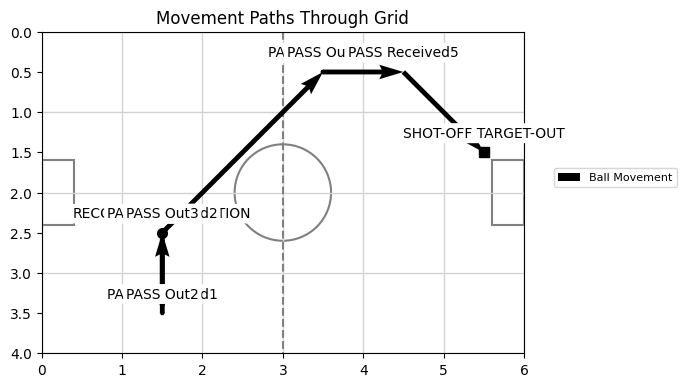

In [205]:
import matplotlib.pyplot as plt
import numpy as np
import string
import matplotlib.cm as cm

# Convert grid cell name to center coordinates
def cell_to_coords(cell):
    col_letter = cell[0].upper()
    row_number = int(cell[1:]) - 1
    col_number = string.ascii_uppercase.index(col_letter)
    return (col_number + 0.5, row_number + 0.5)

# Example: define 11 different paths (replace with your actual data)
paths = [
]

# Set up color map
colors = cm.get_cmap('tab10', len(paths))

# Plot
fig, ax = plt.subplots(figsize=(7, 7))

# Draw grid
for i in range(11):
    ax.plot([0, 10], [i, i], color='lightgray', linewidth=1)
    ax.plot([i, i], [0, 10], color='lightgray', linewidth=1)

# === Draw simplified soccer field for 6x4 grid ===
# === Draw simplified soccer field for 6x4 grid using gray elements ===

# Midfield line (vertical center line)
ax.plot([3, 3], [0, 4], color='gray', linestyle='--', linewidth=1.5)

# Center circle
center_circle = plt.Circle((3, 2), 0.6, color='gray', fill=False, linewidth=1.5)
ax.add_patch(center_circle)

# Left goal area: width=0.4, height=0.8, centered at y=2 → y=1.6 to y=2.4
left_goal_area = plt.Rectangle((0, 1.6), 0.4, 0.8, edgecolor='gray', facecolor='none', linewidth=1.5)
ax.add_patch(left_goal_area)

# Right goal area
right_goal_area = plt.Rectangle((5.6, 1.6), 0.4, 0.8, edgecolor='gray', facecolor='none', linewidth=1.5)
ax.add_patch(right_goal_area)


####################################
# Example ball movement path (you'll replace this with your parsed list)
ball_path = ball_movement_grid_cells
ball_coords = [cell_to_coords(cell) for cell in ball_path]
Xb, Yb = zip(*ball_coords)
Ub = np.diff(Xb)
Vb = np.diff(Yb)

# Start positions for arrows
Xb_start = Xb[:-1]
Yb_start = Yb[:-1]

# Plot black arrows for ball movement
ax.quiver(Xb_start, Yb_start, Ub, Vb, angles='xy', scale_units='xy', scale=1,
          color='black', width=0.01, label='Ball Movement', zorder=10)


offset = 0.15  # vertical offset above the start point (adjust as needed)

for i in range(len(ball_path)):
    start_x = Xb[i]
    start_y = Yb[i]

    label = ball_movement_activities[i]

    ax.text(start_x, start_y - offset, label, fontsize=10, color='black', ha='center', va='bottom',
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'), zorder=11)



# Optional: Mark start and end
ax.plot(Xb[0], Yb[0], 'o', color='black', markersize=7)   # Start
ax.plot(Xb[-1], Yb[-1], 's', color='black', markersize=7) # End
####################################




# Settings
ax.set_xlim(0, 6)
ax.set_ylim(0, 4)
ax.set_aspect('equal')
ax.invert_yaxis()
ax.set_title('Movement Paths Through Grid')
ax.legend(loc='lower left', bbox_to_anchor=(1.05, 0.5), fontsize=8)
plt.tight_layout()
plt.grid(False)
plt.show()
